# Generar una Red Neuronal en PyTorch

### Helper

In [84]:
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

### Encabezado é importaciones

In [85]:
# 1. Import PyTorch, numpy and matplotlib

import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms 
from torch import nn
import torch.nn.functional as F
# solo se usa con el modulo secuencial y se quiere dar un nombre a la capa
from collections import OrderedDict
# Importa el optimizador de algoritmos
from torch import optim

### Creación de la arquitectura de la red

In [86]:
# Hyperparameters for our network
# from collections import OrderedDict
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
Network = nn.Sequential(OrderedDict([
                      ('hidden', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('hidden2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.LogSoftmax(dim=1))]))

### Asigación de nuestro Modelo

In [87]:
model = Network # asigna la red al modelo 
# model = Network() # Para cuando no se hace uso del modulo sequencial
model # Me muestra el Modelo

Sequential(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): LogSoftmax()
)

### Foward pass

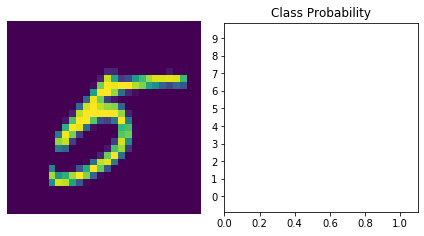

In [97]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()


# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

### Definir optimizador

In [98]:
# from torch import optim
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)
# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

### Calculo del Loss de la red

In [108]:
# Flatten images
images = images.view(images.shape[0], -1)
# Define the loss
criterion = nn.NLLLoss()
# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(0.3688, grad_fn=<NllLossBackward>)


### Visualizar las perdidas

In [109]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()

Before backward pass: 
 tensor([[-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [-0.0083, -0.0083, -0.0083,  ..., -0.0083, -0.0083, -0.0083],
        ...,
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [110]:
print('After backward pass: \n', model[0].weight.grad)

After backward pass: 
 tensor([[-0.0025, -0.0025, -0.0025,  ..., -0.0025, -0.0025, -0.0025],
        [-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021],
        [-0.0110, -0.0110, -0.0110,  ..., -0.0110, -0.0110, -0.0110],
        ...,
        [-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026],
        [-0.0054, -0.0054, -0.0054,  ..., -0.0054, -0.0054, -0.0054],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


### Actulizar los pesos de nuestro modelo

In [113]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0316, -0.0273, -0.0227,  ..., -0.0034, -0.0048,  0.0075],
        [-0.0133, -0.0215, -0.0056,  ..., -0.0321,  0.0219,  0.0057],
        [-0.0037, -0.0060, -0.0287,  ..., -0.0098,  0.0051, -0.0074],
        ...,
        [ 0.0169, -0.0099,  0.0212,  ...,  0.0114, -0.0130,  0.0176],
        [ 0.0083,  0.0353, -0.0056,  ..., -0.0039, -0.0240,  0.0341],
        [-0.0337, -0.0018, -0.0040,  ..., -0.0093,  0.0049, -0.0168]],
       requires_grad=True)


In [105]:
print(loss.item()/len(trainloader))

0.002456649534229531


### Summary Basic of a NN

In [106]:
## Your solution here

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad() ## starts the gradient in zero
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9795567486077739
Training loss: 0.9294423226799283
Training loss: 0.5594100602971974
Training loss: 0.4483161961346039
Training loss: 0.3968757727284675
Training loss: 0.36671355538276723
Training loss: 0.3458937447208331
Training loss: 0.3301157924428042
Training loss: 0.3181086416278821
Training loss: 0.3072906845271079
Training loss: 0.29826963943109586
Training loss: 0.2898203267384249
Training loss: 0.2820076807094281
Training loss: 0.2746723740895801
Training loss: 0.26732358446062754


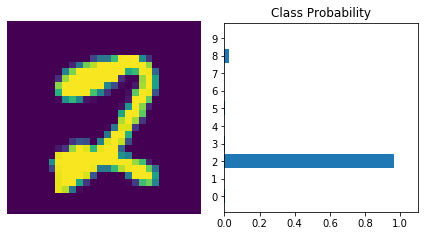

In [107]:
%matplotlib inline
#import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
# evita que los gradientes se vuelvan acumulativos
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)